In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
from scipy.signal import periodogram

In [3]:
dfcol =["Year","Day","Hour","ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT"]
df=pd.read_csv('DATASETS\ACE_DATA_HOURLYAVG.txt',sep=',',header=None,names=dfcol)
df

,Year,Day,Hour,"ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT"
0,1998,60,0,-0.1,9.9,-8.5
1,1998,60,1,-0.6,9.8,-6.7
2,1998,60,2,-0.7,11.3,-3.9
3,1998,60,3,0.5,9.8,-3.0
4,1998,60,4,1.7,3.8,4.9
...,...,...,...,...,...,...
2203,1998,151,19,-1.5,3.8,1.4
2204,1998,151,20,-3.9,2.3,-1.0
2205,1998,151,21,-4.3,0.9,1.2
2206,1998,151,22,-4.0,0.7,2.0


In [4]:
df = df[~df.isin([999.9]).any(axis=1)]
df.shape

(2207, 6)

In [5]:
df["datetime_column"] = pd.to_datetime(df["Year"].astype(str) + df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")
df

C:\Users\tanis\AppData\Local\Temp\ipykernel_21544\3209360267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime_column"] = pd.to_datetime(df["Year"].astype(str) + df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")


,Year,Day,Hour,"ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT",datetime_column
0,1998,60,0,-0.1,9.9,-8.5,1998-03-01 00:00:00
1,1998,60,1,-0.6,9.8,-6.7,1998-03-01 01:00:00
2,1998,60,2,-0.7,11.3,-3.9,1998-03-01 02:00:00
3,1998,60,3,0.5,9.8,-3.0,1998-03-01 03:00:00
4,1998,60,4,1.7,3.8,4.9,1998-03-01 04:00:00
...,...,...,...,...,...,...,...
2203,1998,151,19,-1.5,3.8,1.4,1998-05-31 19:00:00
2204,1998,151,20,-3.9,2.3,-1.0,1998-05-31 20:00:00
2205,1998,151,21,-4.3,0.9,1.2,1998-05-31 21:00:00
2206,1998,151,22,-4.0,0.7,2.0,1998-05-31 22:00:00


In [6]:
impcol=["ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT"]

In [7]:
df.dtypes

Year                        int64
Day                         int64
Hour                        int64
ACE Bx_gse, nT            float64
ACE By_gse, nT            float64
ACE Bz_gse, nT            float64
datetime_column    datetime64[ns]
dtype: object

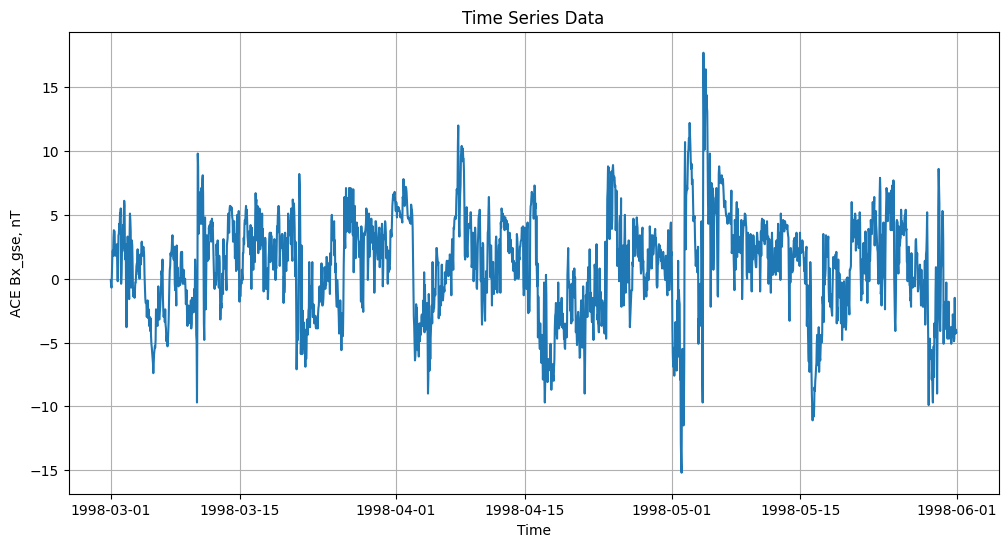

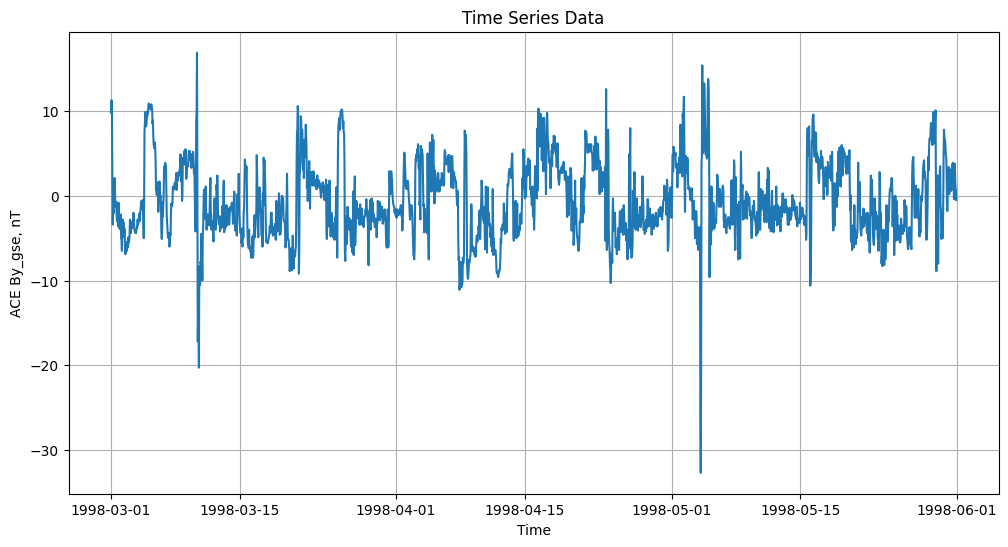

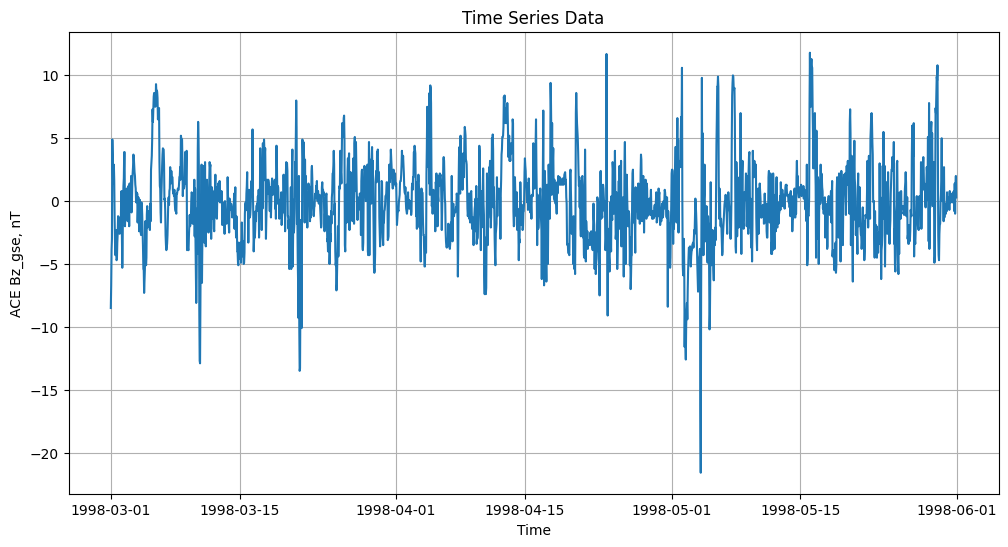

In [8]:
for i in impcol:
    plt.figure(figsize=(12, 6))
    plt.plot(df['datetime_column'], df[i])
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.grid(True)
    plt.show()


C:\Users\tanis\AppData\Local\Temp\ipykernel_21544\2409200826.py:13: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / xf, amplitude)


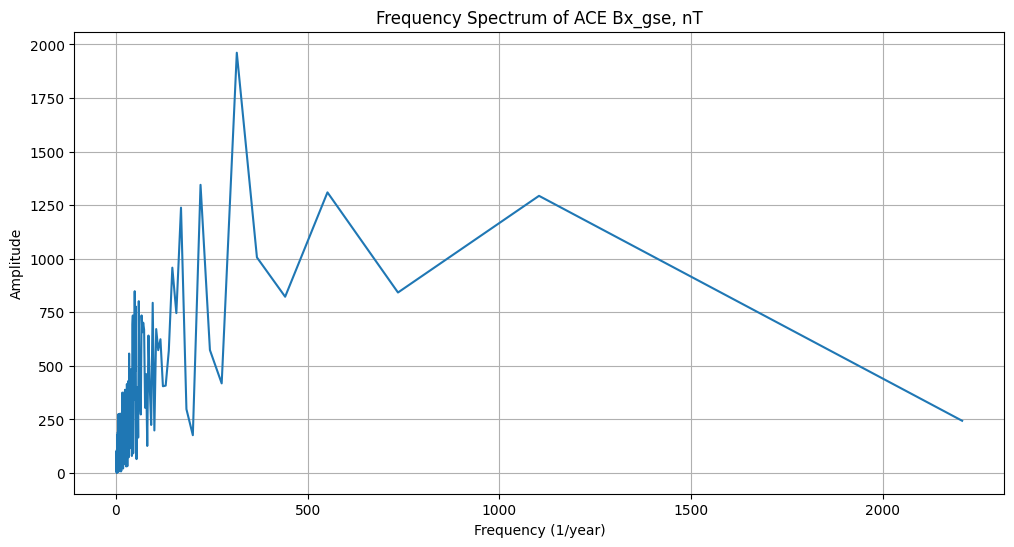

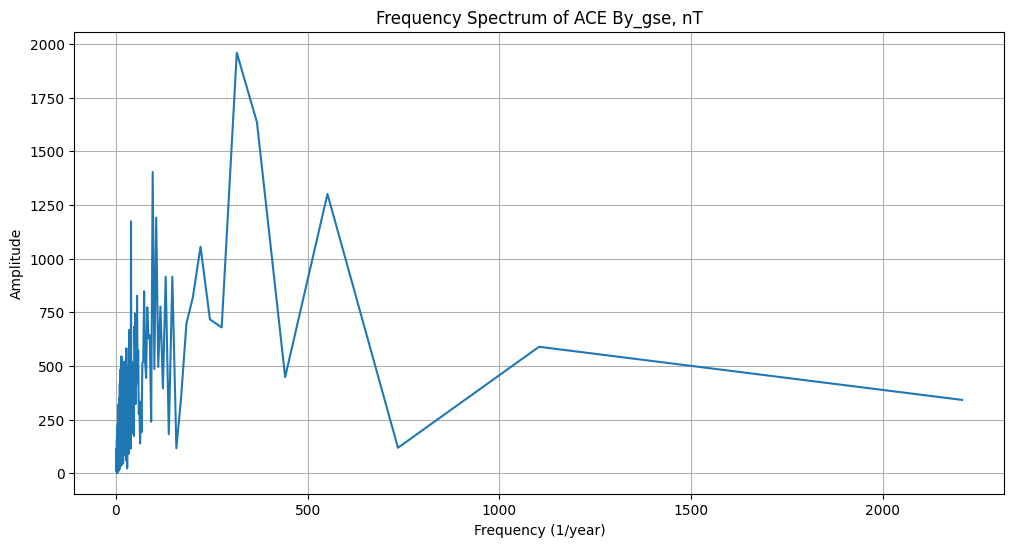

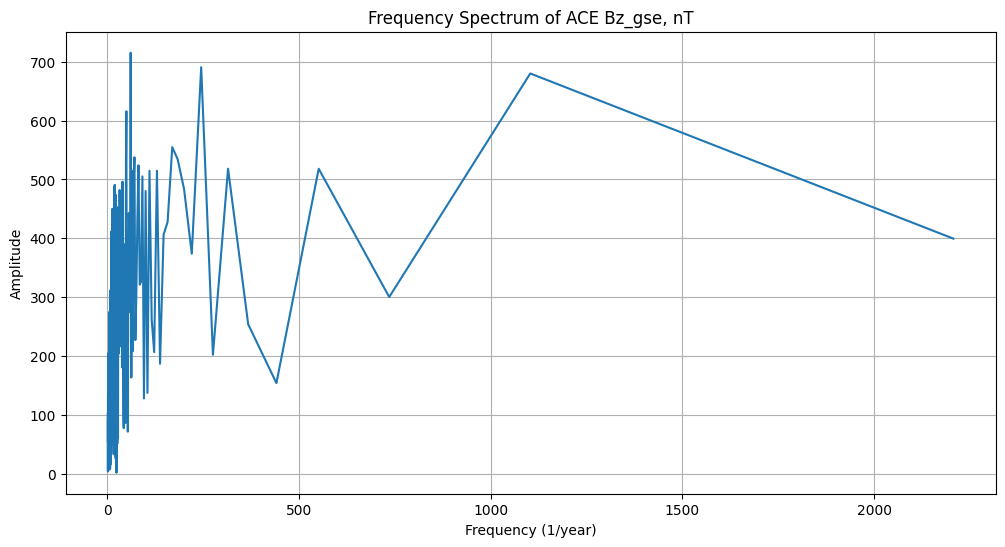

In [9]:
# Perform FFT on the time series data
for i in impcol:
    N = len(df)
    yf = fft(df[i].values)
    xf = np.fft.fftfreq(N, 1)  # Frequency bins

    # Calculate the amplitude spectrum (absolute values)
    amplitude = np.abs(yf)[:N // 2]
    xf = xf[:N // 2]

    # Plot the amplitude spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(1 / xf, amplitude)
    plt.title('Frequency Spectrum of '+i)
    plt.xlabel('Frequency (1/year)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


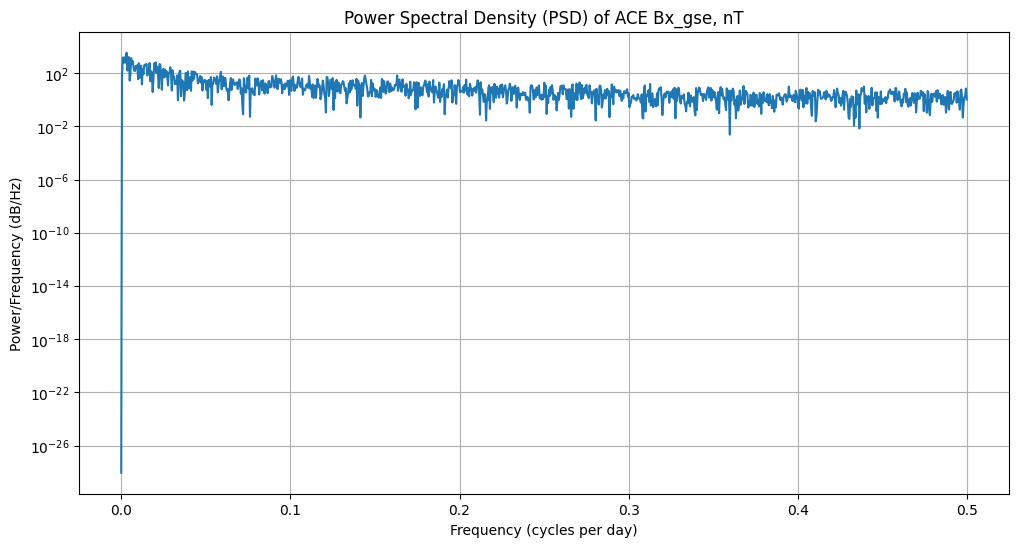

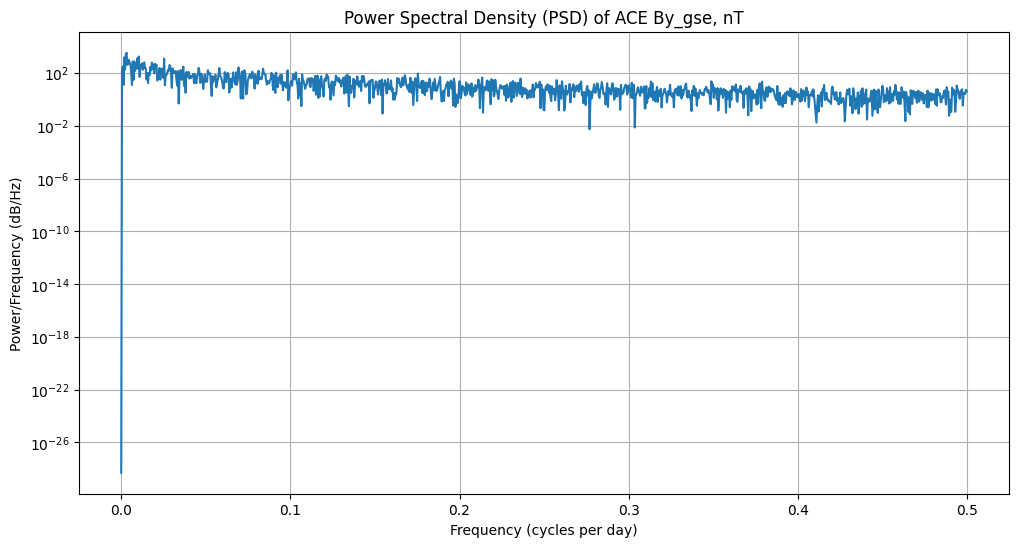

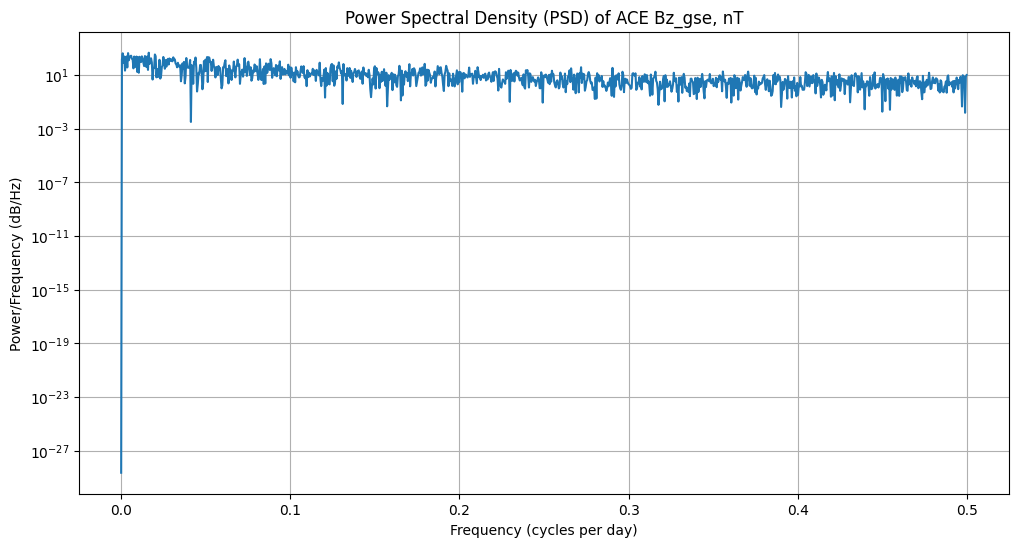

In [10]:
for i in impcol:
    frequencies, power_density = periodogram(df[i], fs=1.0)  # Assuming data is sampled daily

    # Plot the power spectral density
    plt.figure(figsize=(12, 6))
    plt.semilogy(frequencies, power_density)
    plt.title('Power Spectral Density (PSD) of '+i)
    plt.xlabel('Frequency (cycles per day)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.grid(True)
    plt.show()